## Import libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.porter import PorterStemmer
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
import ast
import pickle

## Load datasets

In [2]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
# first 5 records from each dataset
print("Credits")
credits.head()


Credits


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
print("Movies")
movies.head()

Movies


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
print(credits.info())
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   

In [6]:
print(movies.shape)
print(credits.shape)

(4803, 20)
(4803, 4)


In [7]:
# Fill missing values
movies['overview'].fillna('', inplace=True)
movies['tagline'].fillna('', inplace=True)

In [8]:
print(movies['original_language'].value_counts())
print(movies['genres'].head(5))

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64
0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object


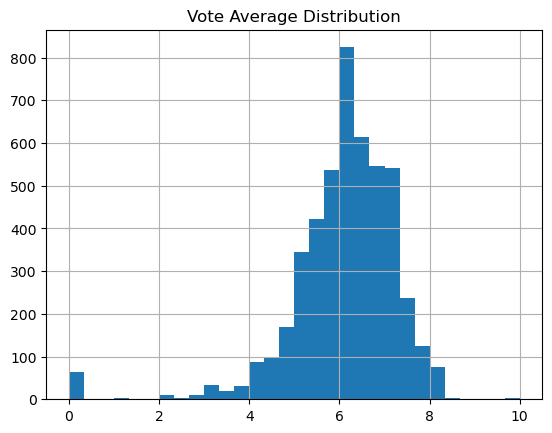

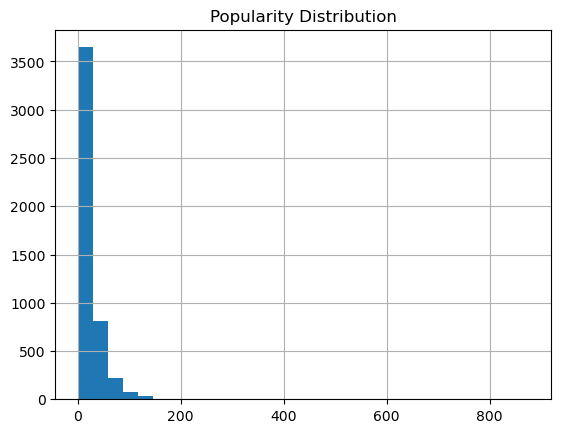

In [9]:
import matplotlib.pyplot as plt
movies['vote_average'].hist(bins=30)
plt.title('Vote Average Distribution')
plt.show()

movies['popularity'].hist(bins=30)
plt.title('Popularity Distribution')
plt.show()

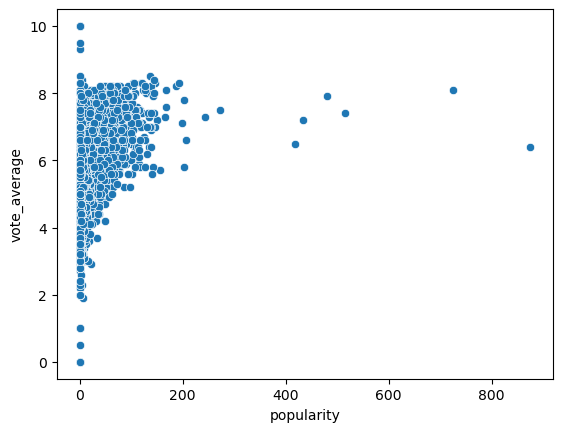

In [10]:
import seaborn as sns
sns.scatterplot(data=movies, x='popularity', y='vote_average')
plt.show()


In [11]:
top_rated = movies.sort_values('vote_average', ascending=False).head(10)
print(top_rated[['title','vote_average','popularity']])

most_popular = movies.sort_values('popularity', ascending=False).head(10)
print(most_popular[['title','popularity','vote_average']])

                         title  vote_average  popularity
3519          Stiff Upper Lips          10.0    0.356495
4247     Me You and Five Bucks          10.0    0.094105
4045     Dancer, Texas Pop. 81          10.0    0.376662
4662            Little Big Top          10.0    0.092100
3992                 Sardaarji           9.5    0.296981
2386            One Man's Hero           9.3    0.910529
2970        There Goes My Baby           8.5    0.037073
1881  The Shawshank Redemption           8.5  136.747729
2796     The Prisoner of Zenda           8.4    4.021389
3337             The Godfather           8.4  143.659698
                                                 title  popularity  \
546                                            Minions  875.581305   
95                                        Interstellar  724.247784   
788                                           Deadpool  514.569956   
94                             Guardians of the Galaxy  481.098624   
127                    

In [12]:
# Merge datasets
movies_df = movies.merge(credits, on='title')

In [13]:
movies_df = movies_df[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew','vote_average']]
movies_df.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2


In [14]:
print(movies_df.info())
print(movies_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4809 non-null   int64  
 1   title         4809 non-null   object 
 2   overview      4809 non-null   object 
 3   genres        4809 non-null   object 
 4   keywords      4809 non-null   object 
 5   cast          4809 non-null   object 
 6   crew          4809 non-null   object 
 7   vote_average  4809 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 300.7+ KB
None
movie_id        0
title           0
overview        0
genres          0
keywords        0
cast            0
crew            0
vote_average    0
dtype: int64


In [15]:
movies_df.dropna(inplace=True)
movies_df.duplicated().sum()

0

In [16]:
from collections import Counter
all_genres = movies_df['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if x else [])
flat_genres = [g for sublist in all_genres for g in sublist]
Counter(flat_genres).most_common(10)


[('Drama', 2300),
 ('Comedy', 1723),
 ('Thriller', 1275),
 ('Action', 1156),
 ('Romance', 895),
 ('Adventure', 792),
 ('Crime', 697),
 ('Science Fiction', 538),
 ('Horror', 520),
 ('Family', 514)]

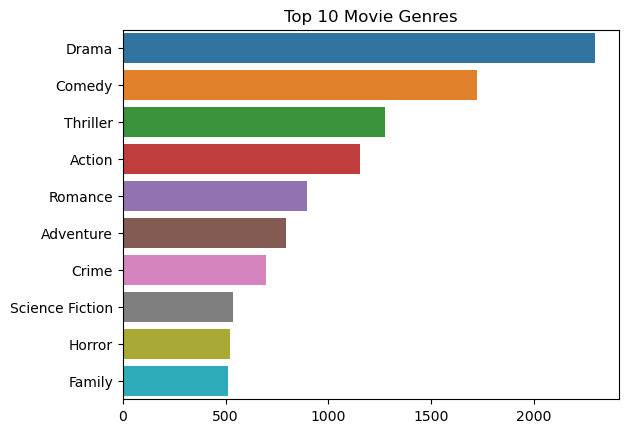

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

top_genres = Counter(flat_genres).most_common(10)
genres, counts = zip(*top_genres)
sns.barplot(x=list(counts), y=list(genres))
plt.title("Top 10 Movie Genres")
plt.show()


In [18]:
# Convert stringified list of dicts to list of names
def parse_features(text):
    try:
        L = [i['name'] for i in ast.literal_eval(text)]
        return L
    except:
        return []
    
# Limit cast to top 3
def parse_cast(text):
    try:
        L = [i['name'] for i in ast.literal_eval(text)][:3]
        return L
    except:
        return []
    
# Extract director name from crew
def parse_director(text):
    try:
        L = [i['name'] for i in ast.literal_eval(text) if i['job']=='Director']
        return L
    except:
        return []

In [19]:
movies_df['genres'] = movies_df['genres'].apply(parse_features)
movies_df['keywords'] = movies_df['keywords'].apply(parse_features)
movies_df['cast'] = movies_df['cast'].apply(parse_cast)
movies_df['crew'] = movies_df['crew'].apply(parse_director)

In [20]:
# Remove spaces in names for consistency
for col in ['genres','keywords','cast','crew']:
    movies_df[col] = movies_df[col].apply(lambda x: [i.replace(" ","") for i in x])

In [21]:
# Create 'tags' for content-based filtering
# ------------------------------
movies_df['tags'] = movies_df['overview'] + ' ' + movies_df['genres'].apply(lambda x: " ".join(x)) + ' ' + \
                 movies_df['keywords'].apply(lambda x: " ".join(x)) + ' ' + \
                 movies_df['cast'].apply(lambda x: " ".join(x)) + ' ' + \
                 movies_df['crew'].apply(lambda x: " ".join(x))

In [22]:
# Lowercase and stem tags
ps = PorterStemmer()
def stem(text):
    return " ".join([ps.stem(word) for word in text.split()])

movies_df['tags'] = movies_df['tags'].apply(lambda x: stem(x.lower()))

## Content-Based Filtering

In [23]:
# 6️⃣ Content-Based Similarity
# ------------------------------
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
vectors = tfidf.fit_transform(movies_df['tags']).toarray()
similarity = cosine_similarity(vectors)

## Collaborative Filtering (SVD)

In [24]:
#collaborative
# Normalize vote_average to 0-5
movies_df['rating'] = movies_df['vote_average'] * 5  # scale to 5


In [25]:
import random

user_ids = [1, 2, 3, 4, 5]  # example users
ratings_list = []

for user in user_ids:
    for movie_id in movies_df['movie_id'].sample(200).values:  # no parentheses
        rating = random.randint(1, 5)
        ratings_list.append([user, movie_id, rating])

ratings = pd.DataFrame(ratings_list, columns=['userId', 'movieId', 'rating'])


In [26]:
def predict_rating(user_id, movie_id):
    try:
        return svd.predict(user_id, movie_id).est
    except:
        return 3.0  # default rating if no prediction

## Hybrid Recommendation Function

In [27]:
def hybrid_recommendation(user_id, movie_title, top_n=10, movies_df=movies_df):
    movie_title_lower = movie_title.lower()
    titles_lower = movies_df['title'].str.lower().tolist()
    
    if movie_title_lower not in titles_lower:
        return f"Movie '{movie_title}' not found."
    
    idx = movies_df.loc[movies_df['title'].str.lower() == movie_title_lower].index[0]
    distances = similarity[idx]
    
    # Take top 50 content-based similar movies
    sim_scores = list(enumerate(distances))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:50]
    
    hybrid_scores = []
    for i, sim_score in sim_scores:
        movie_id = movies_df.iloc[i]['movie_id']  # use movies_df here
        cf_score = predict_rating(user_id, movie_id) / 5  # scale to [0,1]
        hybrid_score = 0.5 * sim_score + 0.5 * cf_score
        hybrid_scores.append((i, hybrid_score))
    
    hybrid_scores = sorted(hybrid_scores, key=lambda x: x[1], reverse=True)
    recommended_titles = [movies_df.iloc[i[0]]['title'] for i in hybrid_scores[:top_n]]
    return recommended_titles


In [28]:
# ------------------------------
pickle.dump(movies, open('movies.pkl','wb'))
pickle.dump(similarity, open('similarity.pkl','wb'))

In [29]:
print(movies_df.columns)


Index(['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew',
       'vote_average', 'tags', 'rating'],
      dtype='object')


In [30]:
user_id = 1
movie_title = "Deadpool"
print("Recommended Movies:")
print(hybrid_recommendation(user_id, movie_title, top_n=10))


Recommended Movies:
['Ant-Man', 'X-Men', 'Sheena', 'Men of War', 'The Collection', 'Fantastic Four', 'Spider-Man 2', 'Babylon A.D.', 'Spider-Man 3', 'Superman']
